In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import skimage

In [3]:
import pandas

In [4]:
import imbalanced learn

SyntaxError: invalid syntax (<ipython-input-4-eca488ef3e53>, line 1)

# Template Matching

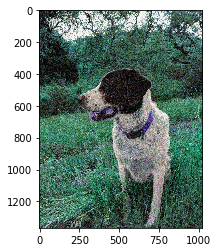

In [2]:
full= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/sammy_noise.jpg')
full= cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

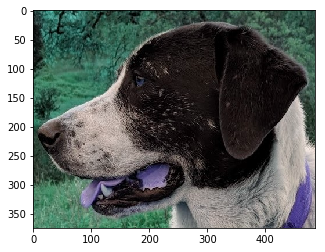

In [3]:
face= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/sammy_face.jpg')
plt.imshow(face)

In [4]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

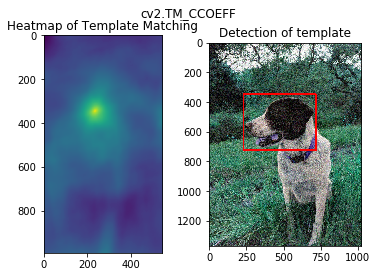

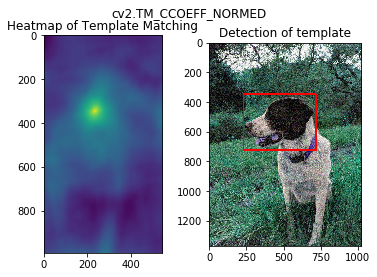

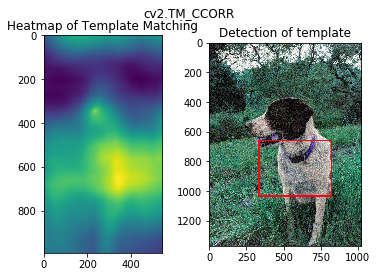

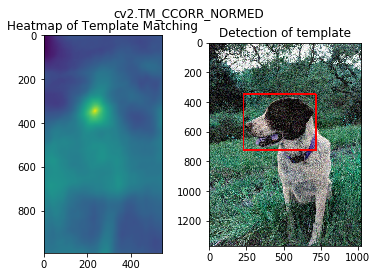

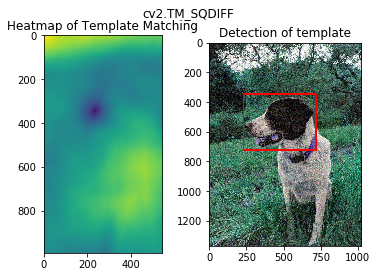

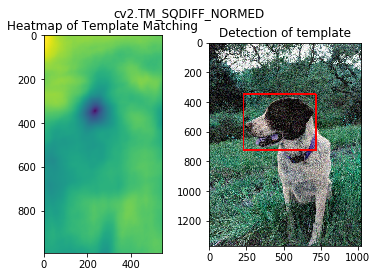

In [5]:
for m in methods:
    #Create a copy of image
    full_copy= full.copy()
    method= eval(m)
    
    #Template matching
    res= cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left= min_loc
    else:
        top_left= max_loc
        
    height, width, channels= face.shape
    
    bottom_right= (top_left[0]+ width, top_left[1]+ height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    #Plot and show the image
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of Template Matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Detection of template")
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')
    

# Corner Detection

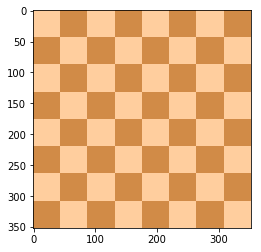

In [6]:
flat_chess= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess= cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

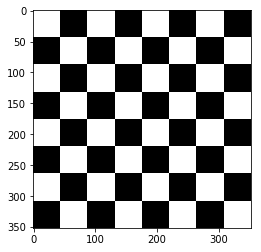

In [7]:
gray_flat_chess= cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

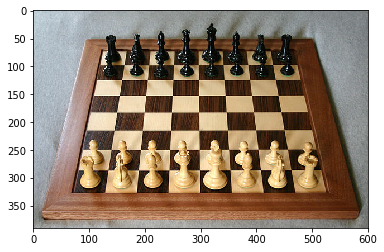

In [8]:
real_chess= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

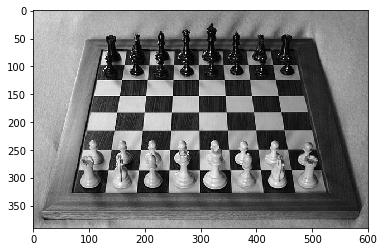

In [9]:
gray_real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap= 'gray')

In [10]:
gray= np.float32(gray_flat_chess)

In [11]:
dst= cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

In [12]:
dst= cv2.dilate(dst, None)

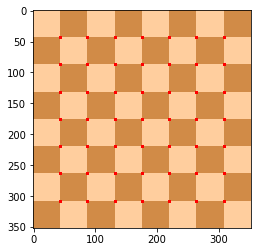

In [13]:
flat_chess[dst>0.01*dst.max()]= [255,0,0]
plt.imshow(flat_chess)

In [14]:
gray= np.float32(gray_real_chess)

dst= cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst= cv2.dilate(dst, None)

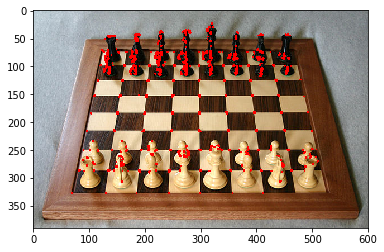

In [15]:
real_chess[dst>0.01*dst.max()]= [255,0,0]
plt.imshow(real_chess)

In [16]:
flat_chess= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess= cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
gray_flat_chess= cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

In [17]:
corners= cv2.goodFeaturesToTrack(gray_flat_chess, 8, 0.01, 10)

In [18]:
corners= np.int0(corners)

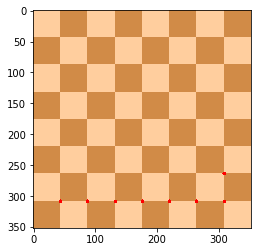

In [19]:
for i in corners:
    x,y= i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

plt.imshow(flat_chess)

In [20]:
corners= cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10)
corners= np.int0(corners)

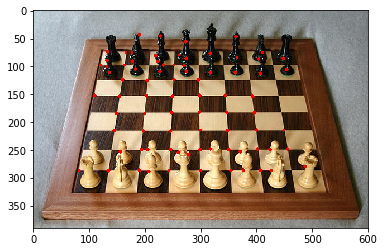

In [21]:
for i in corners:
    x,y= i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

plt.imshow(real_chess)

# Edge Detection

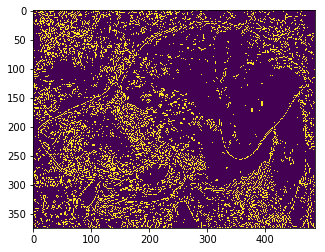

In [22]:
edges= cv2.Canny(face, threshold1=127, threshold2=127)
plt.imshow(edges)

In [23]:
#Formula to calculate threshold
med_val= np.median(face)
lower= int(max(0, 0.7*med_val)) #Lower threshold to either 0 or 70% of median value
upper= int(min(255, 1.3*med_val)) #Upper threshold to either 255 or 130% of median value

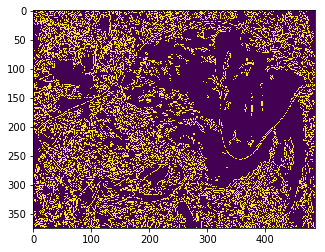

In [24]:
edges= cv2.Canny(face, threshold1= lower, threshold2= upper+100)
plt.imshow(edges)

In [25]:
blurred_img= cv2.blur(face, ksize=(6,6))

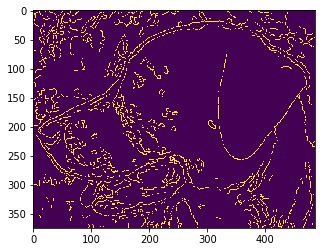

In [26]:
edges= cv2.Canny(blurred_img, threshold1= lower, threshold2= upper)
plt.imshow(edges)

# Grid Detection

In [27]:
found, corners= cv2.findChessboardCorners(flat_chess, (7,7))

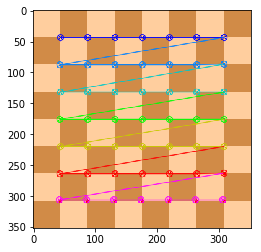

In [28]:
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)
plt.imshow(flat_chess)

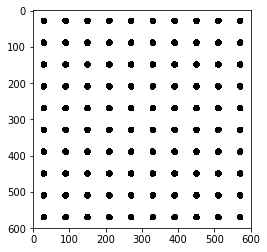

In [29]:
dots= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/dot_grid.png')
plt.imshow(dots)

In [30]:
found, corners= cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [31]:
cv2.drawChessboardCorners(dots, (10,10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

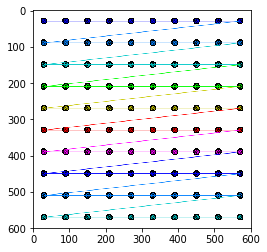

In [32]:
plt.imshow(dots)

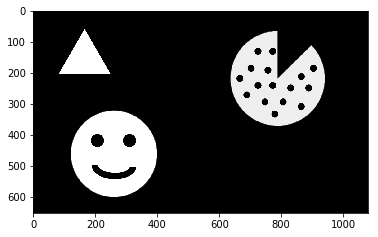

In [33]:
img= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/internal_external.png', 0)
plt.imshow(img, cmap= 'gray')

In [34]:
image,contours,hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [35]:
external_contours= np.zeros(img.shape)
internal_contours= np.zeros(img.shape)

In [36]:
for i in range(len(contours)):
    #External
    if hierarchy[0][i][3]== -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
    else:
        cv2.drawContours(internal_contours, contours, i, 255, -1)
    

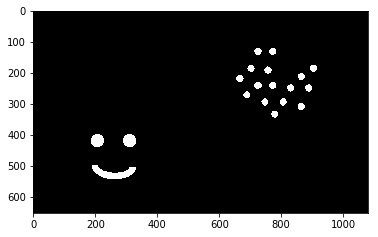

In [37]:
plt.imshow(internal_contours, cmap='gray')

# Feature Matching

In [38]:
def display(img, cmap='gray'):
    fig= plt.figure(figsize=(12,10))
    ax= fig.add_subplot(111)
    ax.imshow(img, cmap)

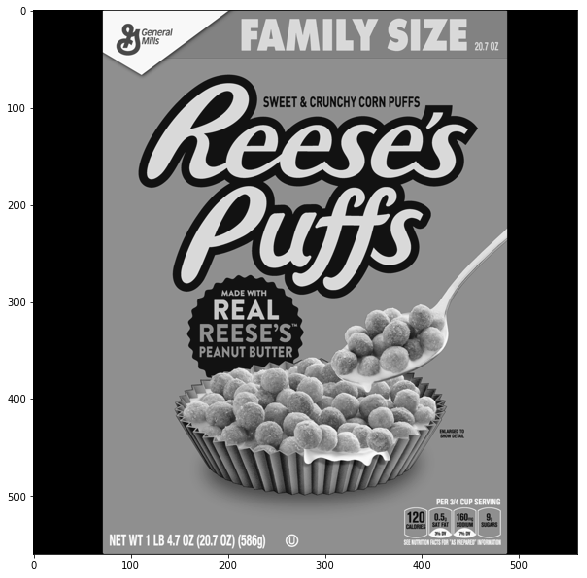

In [39]:
reeses= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/reeses_puffs.png', 0)
display(reeses)

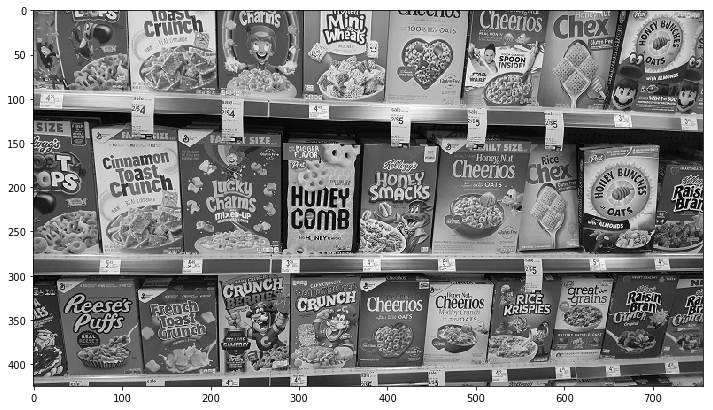

In [40]:
cereals= cv2.imread('C:/Users/HP/Downloads/Dataset/Computer-Vision-with-Python/DATA/many_cereals.jpg', 0)
display(cereals)    

In [41]:
orb= cv2.ORB_create()

In [42]:
kp1, des1= orb.detectAndCompute(reeses, None)
kp2, des2= orb.detectAndCompute(cereals, None)

In [43]:
#Brute force match
bf= cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)

In [44]:
matches= bf.match(des1, des2)

In [45]:
matches= sorted(matches, key= lambda x:x.distance)

In [46]:
reeses_matches= cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

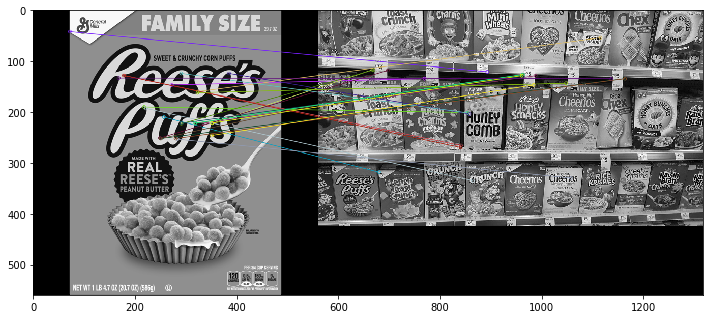

In [47]:
display(reeses_matches)

In [49]:
#sift matching
sift= cv2.xfeatures2d.SIFT_create()

In [50]:
kp1, des1= sift.detectAndCompute(reeses, None)
kp2, des2= sift.detectAndCompute(cereals, None)

In [51]:
bf= cv2.BFMatcher()

In [52]:
matches= bf.knnMatch(des1, des2, k=2) # k best matches

In [53]:
good=[]
#less distance ==> better match
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [54]:
sift_matches= cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

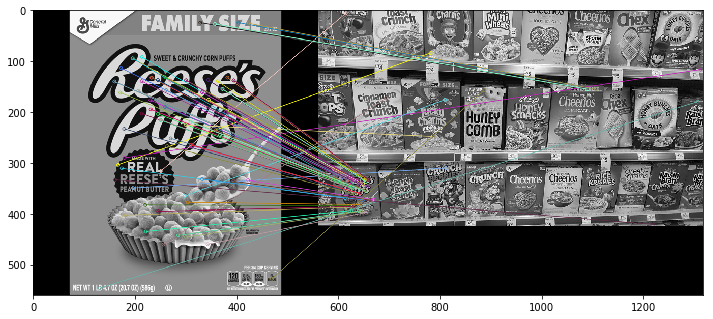

In [55]:
display(sift_matches)

In [64]:
#Flann based match
sift= cv2.xfeatures2d.SIFT_create()

In [65]:
kp1, des1= sift.detectAndCompute(reeses, None)
kp2, des2= sift.detectAndCompute(cereals, None)

In [66]:
#Flann is faster than brute force matchers but only finds general good matches not best
FLANN_INDEX_KDTREE = 0
index_params= dict(algorithm= FLANN_INDEX_KDTREE, trees=5)
search_params= dict(checks=50)

In [67]:
flann= cv2.FlannBasedMatcher(index_params, search_params)

In [68]:
matches= flann.knnMatch(des1, des2, k=2)

In [69]:
matchesMask= [[0,0] for i in range(len(matches))]

In [71]:

for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]= [1,0]
        

In [72]:
draw_params= dict(matchColor= (0,255,0),
                 singlePointColor=(255,0,0),
                 matchesMask= matchesMask,
                 flags=0)

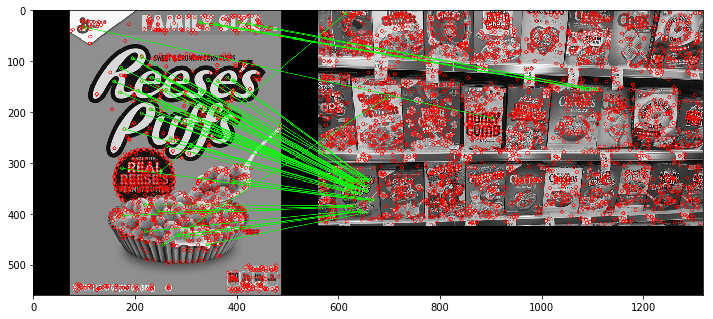

In [74]:
flann_matches= cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)